<a href="https://www.kaggle.com/code/viniciusnalasantos/gradient-descent?scriptVersionId=133219690" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Gradient Descent: Concept & Manual Python Implementation
### Understanding Gradient Descent

![mountain.png](https://cdn-images-1.medium.com/max/1000/1*HoWXTzAifJ2FljZWC2EFBg.jpeg)

### Table of contents

* [Introduction](#introduction)
* [First Things First](#first)
* [Structure of a Learning Algorithm](#structure)
* [Gradient Descent](#gradient)
* [Alpha](#alpha)
* [Gradient Descent Variants](#variants)
    - [Stochastic Gradient Descent](#stochastic)
    - [Adam](#adam)
* [Conclusion](#conclu)

#### Code from the article: [Gradient Descent: Concept & Manual Python Implementation](https://medium.com/@viniciusnala/gradient-descent-concept-manual-python-implementation-d8c5f96a6e85)

<a id="introduction"></a>
## Introduction

Gradient Descent is a very well-known name in the area of Machine Learning and Deep Learning, however, is not such a simple concept. In this article I will try to explain the concept in a clear way, using a more mathematical language so you can understand intuitively what is happening behind the gradient descent.

<a id="first"></a>
## First Things First

Let's start by saying the truth: a machine can't learn. Machines in their inner can only process electrical signals, and what a typical "Learning Machine" does is find a mathematical equation, which, when applied to a collection of inputs (called "training data"), produces the desired output.
 
Over the computational history, we can see that there is a great effort to make machines more and more like us humans, and this is why we have such terms as Artificial Intelligence and Neural Networks. Humanity is still in the process of trying to create a computer that equates to a human mind, something that for me is impossible and will never be done, but there is a great gab of discussion today about whether a machine can be as intelligent as a human or even more intelligent.
 
However this is not the subject of this article, so let's just continue.

<a id="structure"></a>
## Structure of a Learning Algorithm

Any learning algorithm has these three elements:
- _Loss Function:_ the function that calculates the error of the model, the most famous one is the Mean Squared Error
- _Optimization Criteria:_ based on the loss function (minimize the Cost Function, for example)
- _Optimization Routine:_ a routine that will be responsible for leveraging training data to find a solution to the optimization criteria

**Definitions:**
- _Loss Function:_ measures the error for a single training example
- _Cost Function:_ average of the loss function over an entire training dataset

All learning algorithms optimize a specific criterion, ones more explicitly (linear and logistic regression, SVM), and others more implicitly (decision trees and kNN). If you search for optimizers in modern literature, you will often encounter the term **gradient descent**, because this is the most famous optimization algorithm used in cases where the optimization criterion is differentiable.
 
It's difficult to understand this for the first time, but in the next chapter I will give an example of how this works in practice.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising/Advertising.csv


<a id="gradient"></a>
## Gradient Descent

Gradient Descent is an iterative optimization algorithm that leverages data to find the best parameters for specific optimization criteria. It works like this: suppose we have a Linear Regression with 1 variable as input.

*y = b + wx*

*y: output of the Linear Regression Model*

*x: input of the Linear Regression Model*

*b and w: constants (the parameters)*

We will use a simple dataset for Linear Regression in this example.

In [2]:
df = pd.read_csv('/kaggle/input/advertising/Advertising.csv', index_col='Unnamed: 0')
df.drop(['TV', 'newspaper'], axis=1, inplace=True)

In [3]:
df

,radio,sales
1,37.8,22.1
2,39.3,10.4
3,45.9,9.3
4,41.3,18.5
5,10.8,12.9
...,...,...
196,3.7,7.6
197,4.9,9.7
198,9.3,12.8
199,42.0,25.5


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

Text(0.5, 1.0, 'Sales as a function of spendings.')

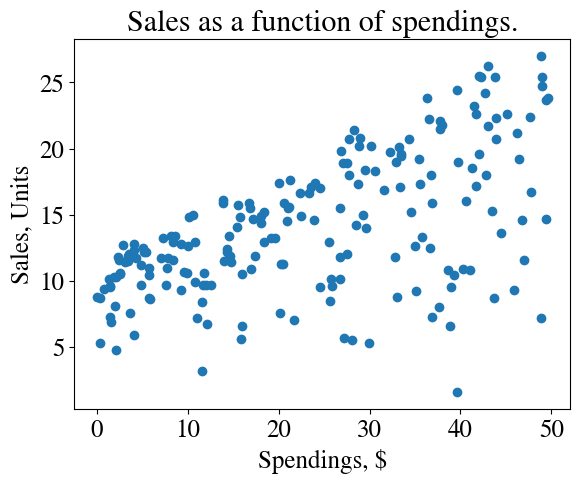

In [5]:
x = df['radio'].reset_index(drop=True)
y = df['sales'].reset_index(drop=True)

plt.scatter(x, y, color='#1f77b4', marker='o')
plt.xlabel("Spendings, $")
plt.ylabel("Sales, Units")
plt.title("Sales as a function of spendings.")

Our loss function will be the Mean Squared Error.

![mse.png](https://cdn-images-1.medium.com/max/1000/1*hGqkoGqQZKoXXhpkQ28yGQ.jpeg)

And the objective of the Gradient Descent in this case is to find the values for the parameters b and w that minimizes the **Mean Squared Error**.

And to do that, the model will initialize both variables as *b = 0* and *w = 0*, and from that moment on it starts the following routine: use all the training data to calculate the Mean Squared Error; according to the error the model updates the values of the params b and w in order to decrease that error; then the model uses all the training data to calculate the Mean Squared Error again but with the updated params; and the same process is repeated many and many times. The math behind this process will be explained later, for now I just want you to understand the concept.

![epochs.png](https://cdn-images-1.medium.com/max/500/1*QnfG-X15hwSyvb9ri_1Ghw.png)
![epochs1.png](https://cdn-images-1.medium.com/max/500/1*tc6cup581X5D02yofjzcAA.png)
![epochs2.png](https://cdn-images-1.medium.com/max/500/1*Z91dbMJ45y24KYkBRiFngw.png)
![epochs3.png](https://cdn-images-1.medium.com/max/500/1*zup99edo6mTIX-rdatnFRw.png)
![epochs4.png](https://cdn-images-1.medium.com/max/500/1*6gUoxqm8tUeTBOpViaYJow.png)
![epochs5.png](https://cdn-images-1.medium.com/max/500/1*h8KSdClOyK6k553uqKJ-IA.png)
![epochs6.png](https://cdn-images-1.medium.com/max/750/1*jih2J3YecBs9WprFDucotw.png)
![epochs7.png](https://cdn-images-1.medium.com/max/750/1*03pDPuZNWPDgNz4ltGh5IQ.png)

Once you understood the essential concept, we can proceed to the math in conjunction with its manual implementation in Python. But, before doing this, I have a little point that I wanna mention: to fully understand what we are going to do is necessary to know calculus and concepts such as chain rule and partial derivative. In virtue of not being the subject of this article explain these, I will explain these concepts very briefly.

We have 200 lines of data in the form of (X, Y) = (Spendings, Sales)

As I said earlier, a linear regression model looks like: *f(x) = wx + b*. We don't know what the optimal values for w and b are and we want to learn them from data. In order to do this, we search for such values for w and b that minimize the **MSE**.

![mse2.png](https://cdn-images-1.medium.com/max/1000/1*G6cvWLJG1UCZv0--VrFDzA.png)

Below we have the function that calculates the MSE:

In [6]:
def loss(spendings, sales, w, b): 
    '''
    Calculate the mean squared error 
    
        Parameters:
                spendings (pandas.core.series.Series): list of X
                sales (pandas.core.series.Series): list of Y
                w (float): value of param w
                b (int): value of param b
        
        Returns:
                mse (float): mean squared error    
    '''
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / N

Gradient descent starts calculating the partial derivatives for all the parameters (in this case, for *w* and *b*). 

Partial derivative is basically this: suppose that we have a function *f* with 3 variables, for example:

*f(x, y, z) = x² + y³ + z⁴*

**A partial derivative of a function of several variables is the ordinary function with respect to one variable when all the others are considered constants**. The partial derivative of *f(x, y, z)* with respect to *x* is:
 
*δf / δx = 2x + 0 + 0*

The partial derivative of the same function with respect to *y* is:
 
*δf / δy = 0 + 3y²+ 0*

Let's start calculating the partial derivative concerning the parameter w of the linear regression.

According to the *chain rule*, if

![eq.png](https://cdn-images-1.medium.com/max/1000/1*rweyOy3NbrzEakNz__XVUg.png)

Then,

![eq2.png](https://cdn-images-1.medium.com/max/1000/1*B8CCRImzuUQ-cSTRx7NtRg.png)

So,

![eq3.png](https://cdn-images-1.medium.com/max/1000/1*fyV4I6_yo-Q70thzMjeB8g.png)

Doing the partial derivative with respect to *w*:

![eq4.png](https://cdn-images-1.medium.com/max/1000/1*muXR5UYnmXGxbmIZ9VKuLw.png)

Reorganizing,

![eq5.png](https://cdn-images-1.medium.com/max/1000/1*aLgIi7qLJbgoNWROKhFMLA.png)

In a similar way, the partial derivative of MSE with respect to b will be calculated:

![eq6.png](https://cdn-images-1.medium.com/max/1000/1*MSik3Wd1bZU_WUcjVA_stg.png)

Gradient descent progresses through **epochs**, and each epoch consists of using the training set entirely to update each parameter. Initially, in the first epoch, we set *w = 0* and *b = 0*. With each subsequent epoch, we update the values of w and b using the partial derivatives. The **learning rate alpha(α)** controls the size of an update:

![eq7.png](https://cdn-images-1.medium.com/max/1000/1*jajI-ovdNE9uIj3L-XRkOQ.png)

Once this is an iterative process, we write:

![eq8.png](https://cdn-images-1.medium.com/max/1000/1*T0buohzVdeYETLx6ICSbuw.png)
wi,bi = next position parameters; wi-1,bi-1 = current position parameters; and when i = 1, then wi-1,bi-1 = 0

Instead of adding the partial derivatives to the parameter values, we perform subtraction because the derivatives reflect the function's growth. A positive derivative indicates growth, thus when minimizing the objective function, we move parameters in the opposite direction, to the left. Conversely, a negative derivative signifies a decreasing function, so we adjust parameters to the right to further decrease the function's value.

At each epoch, the partial derivatives are recalculated using the updated values of w and b, and we continue the process until convergence. Normally, many epochs are needed until start seeing that the values w and b don't change much after each epoch, then we stop.

Converting all these mathematics into a code script results in this:

In [7]:
def update_w_and_b(spendings, sales, w, b, alpha):
    N = len(spendings)
    dr_dw = np.zeros(shape=(N, 1)) # δmse/δw
    dr_db = np.zeros(shape=(N, 1)) # δmse/δb
    
    for i in range(N):
        dr_dw[i] = -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dr_db[i] = -2 * (sales[i] - (w * spendings[i] + b))
        
    dr_dw_ = np.longlong(dr_dw.sum())
    dr_db_ = np.longlong(dr_db.sum())

    # update w and b
    w = w - (1/float(N)) * dr_dw_ * alpha # alpha = learning rate
    b = b - (1/float(N)) * dr_db_ * alpha
    
    # return the w and b updated
    return w, b

This function updates the parameters w and b during one epoch.

Below is the function that iterates through multiple epochs.

In [8]:
def train(spendings, sales, w, b, alpha, epochs):
    image_counter = 2;
    
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)

        # log the progress
        if (e == 0) or (e < 3000 and e % 400 == 0) or (e % 3000 == 0):
            print("epoch: ", str(e), "loss: "+ '%.2f'%(loss(spendings, sales, w, b)))
            print("w, b: " + "%.2f"%(w)+ " " + "%.2f"%(b))
            plt.figure(image_counter)
            axes = plt.gca()
            axes.set_xlim([0,50])
            axes.set_ylim([0,30])
            plt.scatter(spendings, sales)
            X_plot = np.linspace(0,50,50)
            plt.plot(X_plot, X_plot*w + b)
            image_counter += 1
            
    return w, b

Running the train function for *w = 0*, *b = 0*, *α = 0.001*, and 3000 epochs, we have the following output:

epoch:  0 loss: 92.32
w, b: 0.74 0.03
epoch:  400 loss: 33.80
w, b: 0.43 1.93
epoch:  800 loss: 28.00
w, b: 0.38 3.45
epoch:  1200 loss: 24.34
w, b: 0.34 4.66
epoch:  1600 loss: 22.03
w, b: 0.32 5.61
epoch:  2000 loss: 20.58
w, b: 0.29 6.37
epoch:  2400 loss: 19.66
w, b: 0.27 6.98
epoch:  2800 loss: 19.08
w, b: 0.26 7.46


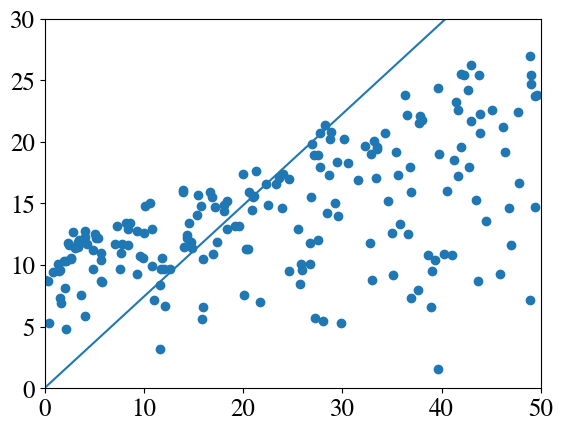

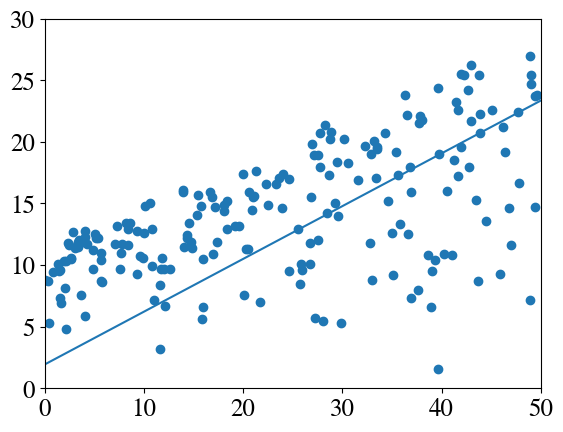

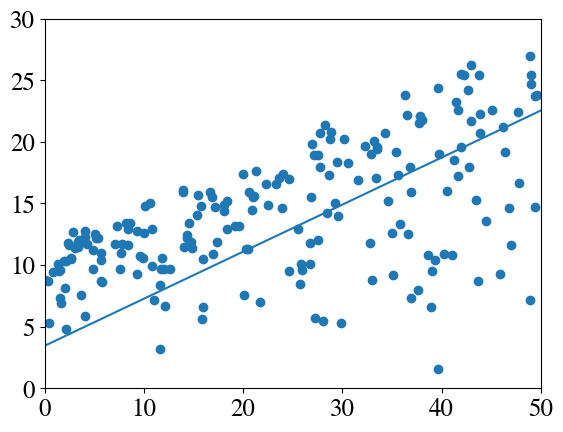

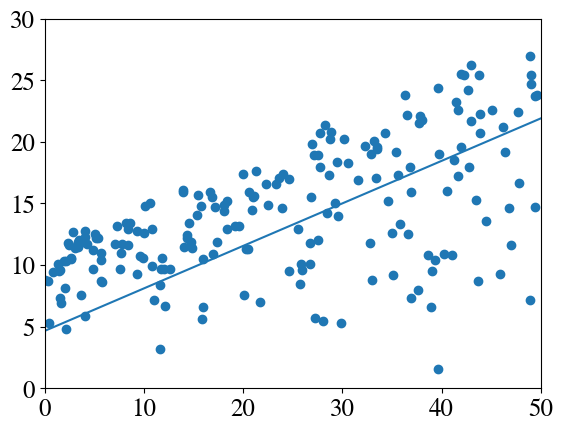

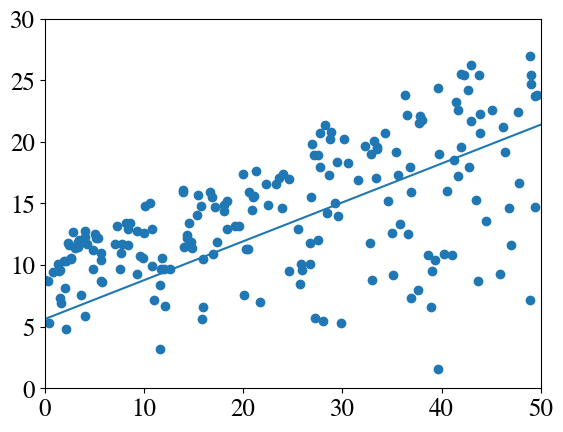

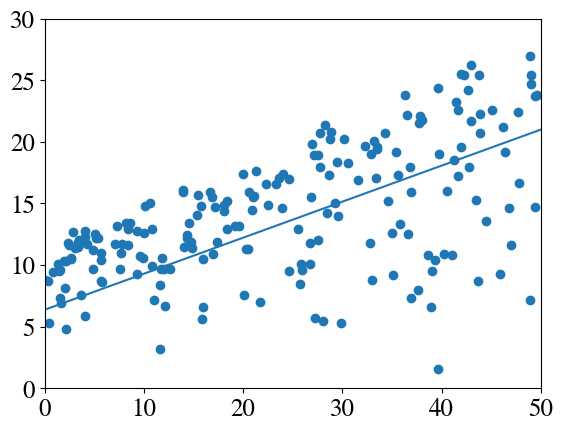

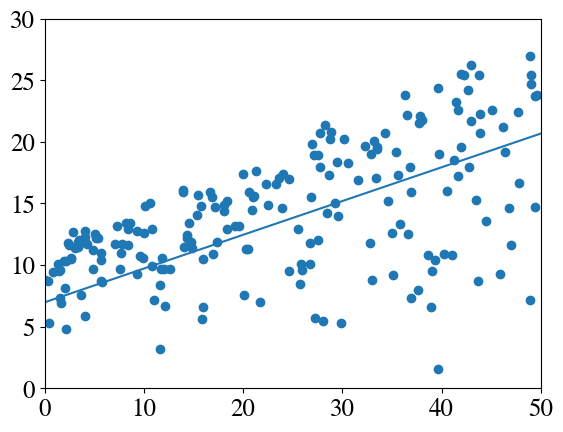

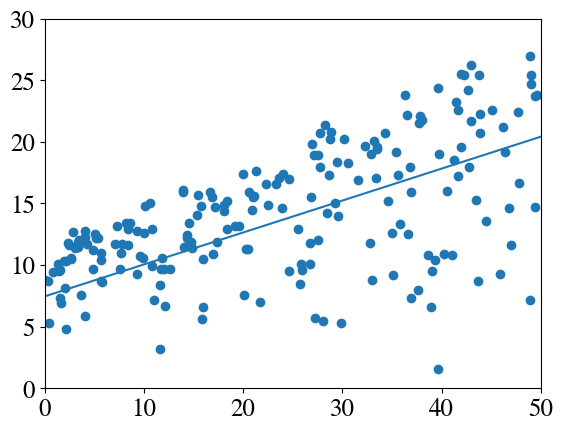

In [9]:
w, b = train(x, y, 0.0, 0.0, 0.001, 3000)

We can see that the loss decreases as the train function goes through the epochs. 

After obtaining the optimal values for parameters *w* and *b*, the only missing piece is a function that performs the predictions:

In [10]:
def predict(x, w, b):
    return w*x + b

x_new = 26.0
y_new = predict(x_new, w, b)
y_new

14.238630000000002

When we are dealing with high-dimensional data and a complex cost function, this process can take a long time and be computationally expensive.

<a id="alpha"></a>
## Alpha

Gradient descent is sensitive to the choice of the learning rate α, and deciding its ideal value can be a challenge. Suppose that we have the following objective function:

*f(x) = 2–3x² + x⁴*

The graph of this function with its slope at selected points along the curve is shown below

![func.png](https://cdn-images-1.medium.com/max/1000/1*0sY3HKOYVzIMSltW5OrE_w.png)

According to the slope at specific points that the gradient estimates the next step in the minimization. If the alpha is too high, it takes bigger steps, whereas a low alpha takes smaller steps. Look at this example.

![steps1.png](https://cdn-images-1.medium.com/max/1000/1*EjMUc9H2KOpXyollcD5FCA.png)

Here, the function is *f(x) = x²*, *α = 0.05*, and took 10 steps.

![steps2.png](https://cdn-images-1.medium.com/max/1000/1*WlUwvfYeY1YgqhWITUEYOQ.png)

In this one, the function is the same, *α = 0.40*, and took 5 steps.

As you can see, the step is so big in the second photo that surpasses the minimal point. And this is a problem because the α is so high that causes oscillations, in some cases, the gradient can't even reach the minimum.

Returning to our initial function, let's consider the following Python implementation of gradient descent using Sympy.

In [11]:
# Library
import sympy as sm

x = sm.var('x')
f = 2 - 3*x**3 + x**4 # Function
df = f.diff(x) # Derivative

x0 = 0.1 # The point where parameter x will start
xlist = [(x0, f.subs(x, x0))] # Store the values of x0 along the curve

alpha = 0.1 # Step size

for i in range(20): # 20 steps
    x0 = x0 - alpha * df.subs(x, x0) # Gradient Descent
    xlist.append((x0, f.subs(x, x0)))

Below is a photo of the sequential steps:

![steps3.png](https://cdn-images-1.medium.com/max/1000/1*mn6nzcjCNybPmjJP3uhyzg.png)

Note that the algorithm oscillates at the end because the step size is too large. This makes the algorithm converge very slowly, moreover, if it is a deep learning algorithm, which can have very complex functions, then the algorithm cannot guarantee finding the global minimum.

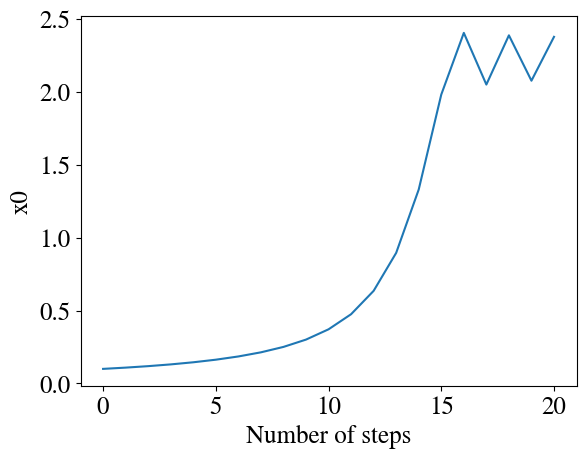

In [12]:
n_iter = [i for i in range(21)] # number of steps
x_ = [_[0] for _ in xlist]      # X0 values

# Plot
plt.plot(n_iter, x_)
plt.xlabel('Number of steps')
plt.ylabel('x0')
plt.show()

When we are dealing with many parameters, is almost impossible to know the optimal step size without strong assumptions on f(x). So the way that a data scientist gets around this is by using the tactic of try and failure. For example, we can use GridSearchCV of Sklearn to test many alpha values and see which one reaches the lowest point.

<a id="variants"></a>
## Gradient Descent Variants

All its variants have the same essential concept, which is to minimize an objective function. The difference is the methods they use to update the parameters. There are many variants, here I will explain the most famous ones.

<a id="stochastic"></a>
### Stochastic Gradient Descent

While in common gradient descent, you have to use all samples in the training set to update the parameters, in SGD (Stochastic Gradient Descent) you use only a subset of the training set to update the parameter.

Therefore, if the number of training samples is very large, then using gradient descent may take too long because in every iteration when you are updating the values of the parameters, you are running through the complete training set.
 
So SGD will converge faster, however, the objective function maybe will not be minimized as well as in GD.

<a id="adam"></a>
### Adam

Frequently used in neural network training, Adam is a more intelligent optimizer because, based on the historical gradient information, it adapts the learning rate during the training. Different from SGD which has a fixed α value. This optimizer tends to converge faster and has more probability of not getting stuck in a local minimum.

<a id="conclu"></a>
## Conclusion

Well, it was a long journey until we finally understand gradient descent, and I've not explained everything about GD, but I hope what I showed here proves useful to you. With this knowledge, you are already capable of studying in more depth by yourself.

What you need to know is that the optimizers are always being updated, and as time goes by, new optimizers arise, faster and more complex.

#### Code from the article: [Gradient Descent: Concept & Manual Python Implementation](https://medium.com/@viniciusnala/gradient-descent-concept-manual-python-implementation-d8c5f96a6e85)

## References

- Widder, David V. Widder. (1989). Advanced Calculus: Second Edition, Dover Publications
- Burkov, Andriy Burkov. (2019). The Hundred-Page Machine Learning Book, Andriy Burkov
- Unpingco, José Unpingco. (2022). Python for Probability, Statistics, and Machine Learning: Second Edition, Springer